In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('cleaned_data.csv')

df.head(10), df.shape, df.columns

(              ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
 0  798fc410-45c1      20000    2          2         1   24      2      2   
 1  8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
 2  85698822-43f5      90000    2          2         2   34      0      0   
 3  0737c11b-be42      50000    2          2         1   37      0      0   
 4  3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
 5  ceae2946-47e4      50000    1          1         2   37      0      0   
 6  d3b8ce26-9c89     500000    1          1         2   29      0      0   
 7  d6e1911b-54d0     100000    2          2         2   23      0     -1   
 8  8421d3b3-2b54     140000    2          3         1   28      0      0   
 9  62a2fd79-cd90      20000    1          3         2   35     -2     -2   
 
    PAY_3  PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
 0     -1     -1  ...         0         0         0         0   
 1      0      0  ...

Will begin to exame the financial history features of this dataset. <br>
1. The status of monthly payments for last six months <br>
2. The billed amounts for that period. <br>
3. The paid amounts for that period.

In [4]:
pay_feats = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Will look at value counts for __PAY_1__, sorted by ordinal values (which is in the index)

In [5]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot:>

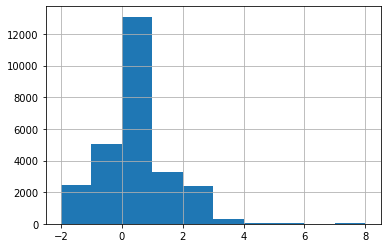

In [8]:
df[pay_feats[0]].hist()

Text(0, 0.5, 'Number of accounts')

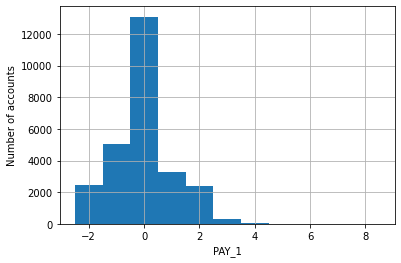

In [9]:
pay_1_bins = np.array(range(-2,10))-0.5
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

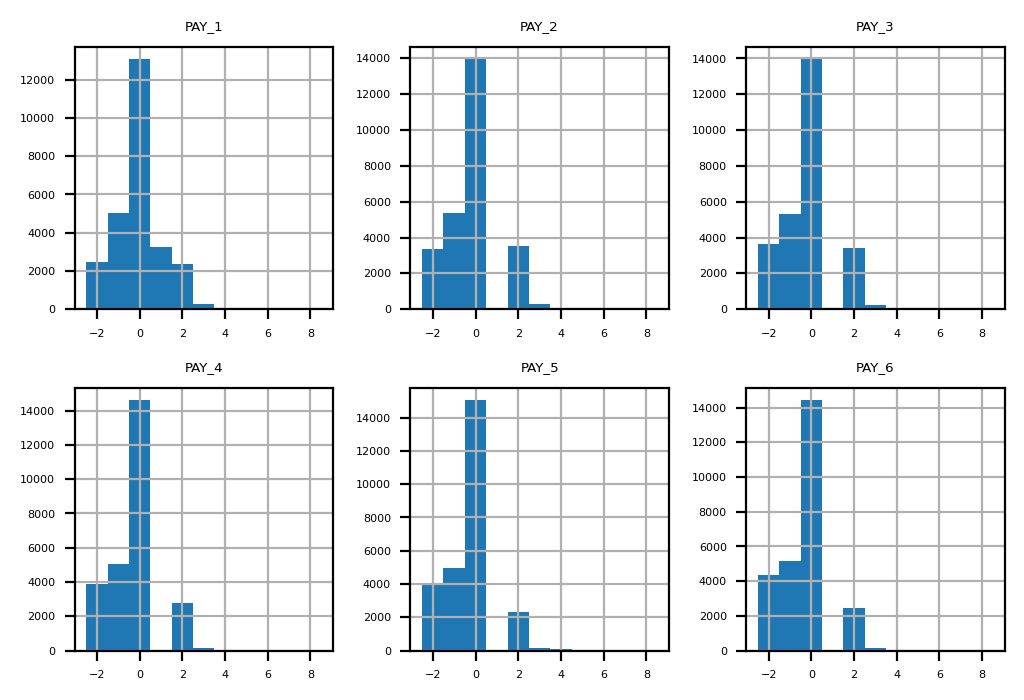

In [16]:
mpl.rcParams['font.size'] = 4 #adjust fontsize for multi-grid plot to fit well
mpl.rcParams['figure.dpi'] = 200
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3)) #2x3 grid of plots

Note that __PAY_2__ which are payments for August have approximately 4000 accounts at 2 = 2-month payment delay, but __PAY_3__ which are payments for July (the month prior) have virtually no accounts at 1 = 1-month payment delay, which shows a discrepancy. <br>
We will mask for accounts with payment status of 2 in August and see the payment status columns for August and July

In [17]:
df.loc[df['PAY_2']==2, ['PAY_2','PAY_3']].head(10)

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
50,2,0
57,2,2
61,2,2
82,2,0
83,2,2


Turns out the value of __1__ is underreported in all months except for September (__PAY_1__). <br>
Thus we conclude only __PAY_1__ is representative of future data to be used to make predictions, as it is this most recent feature that has accurate values.

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [38]:
pay_amt_feats = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
bill_amt_feats = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
df[bill_amt_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

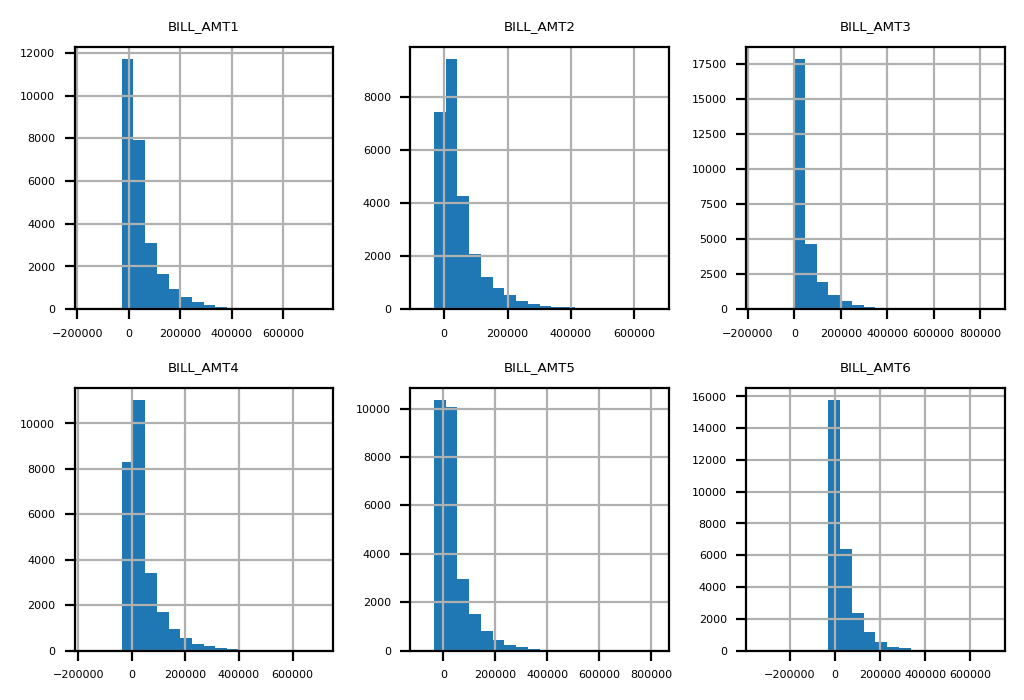

In [35]:
df[bill_amt_feats].hist(bins=20, layout=(2,3))

In [37]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

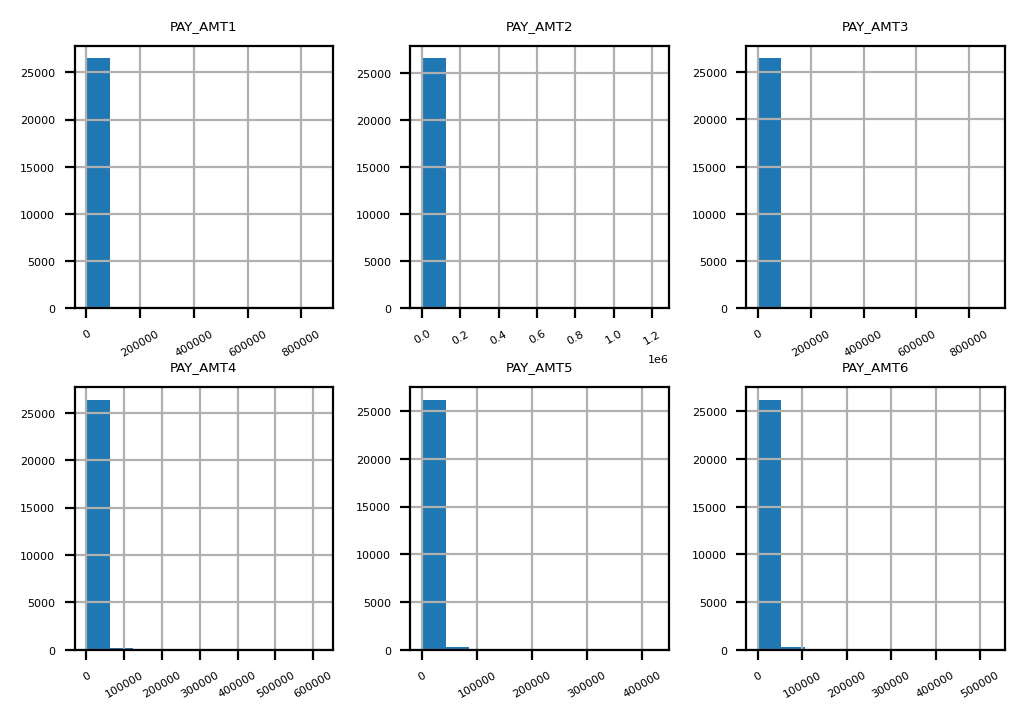

In [39]:
df[pay_amt_feats].hist(layout=(2,3),xrot=30)

In [51]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

Roughly 20% of accounts have bill status payment = 0. To get a better visualization of the data, we will apply __log_10__ to the values, and to do so will require us to filter out the status payment = 0 as log is undefined at zero.

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

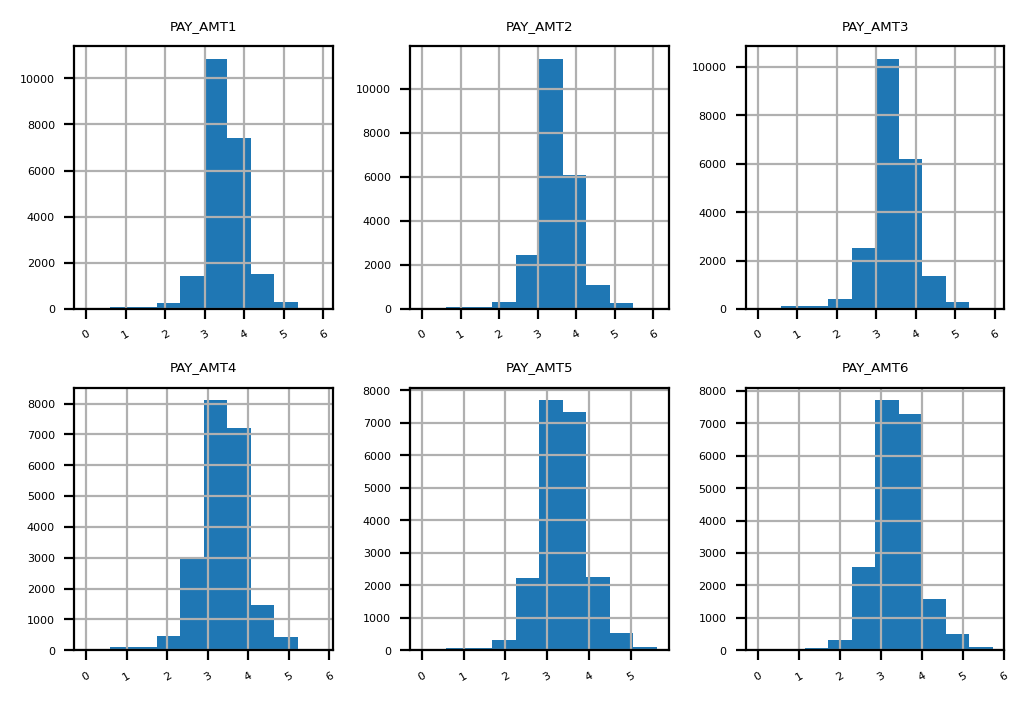

In [54]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3), xrot=30)